### Dados Kaggle
#### https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## Importando Dados

In [4]:
#Importando dados no dataframe e visualizando
df = pd.read_csv("dados/Salary_dataset.csv", index_col=0)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Explorando Dados

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [12]:
#Valor médio da variável target, pode ser interpretado como valor médio esperado da previsão
vlr_mean_predict = target.mean()
vlr_mean_predict

76004.0

In [16]:
#SSE simulado
#SSE é a diferença ao quadrodo entre o valor previsto e o valor observado
squared_error = pd.Series(vlr_mean_predict - df['Salary']) ** 2
SSE = np.sum(squared_error)
print('Soma dos Quadrados dos Erros (SSE):  %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE):  21794977852


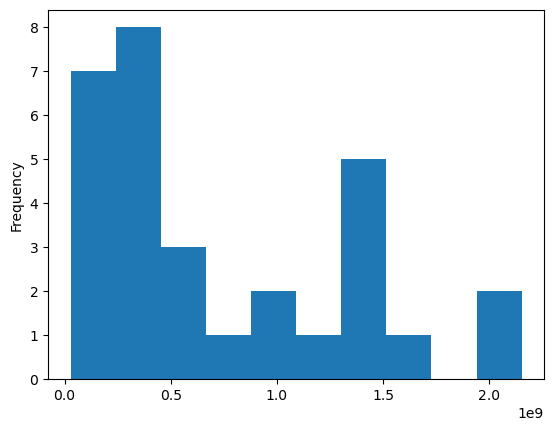

In [19]:
# Se os erros estivessem concentrados na menor taxa, significa que a var target estava normalizada, neste caso aparentemente não esta
hist_plot = squared_error.plot(kind='hist')

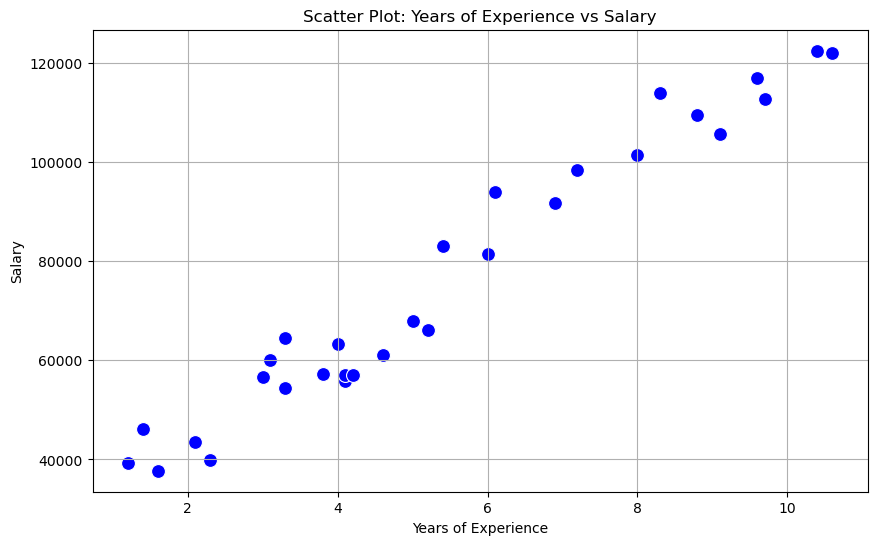

In [28]:
# Scatterplot para ver relação das variáveis
plt.figure(figsize=(10, 6))

sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='b', s=100)

plt.title('Scatter Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

plt.show()

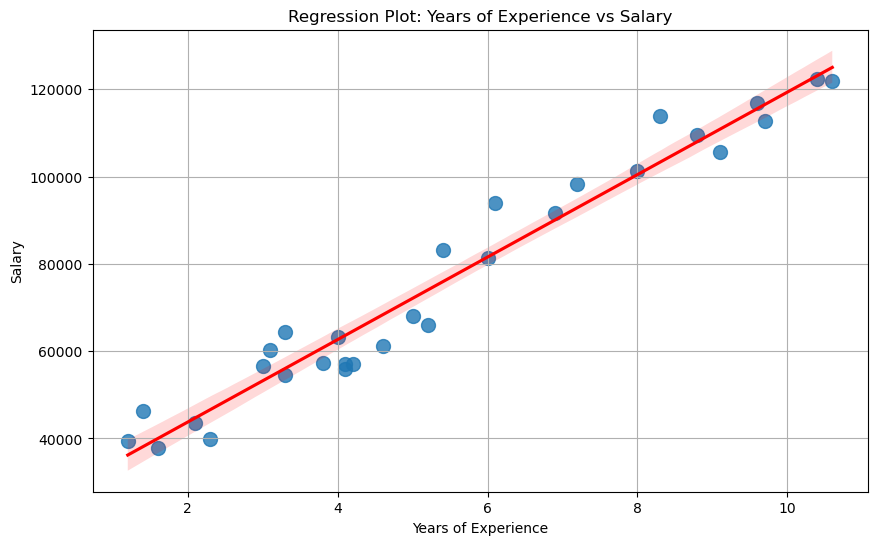

In [31]:
# Visualizando a relação linear
plt.figure(figsize=(10, 6))

sns.regplot(x='YearsExperience', y='Salary', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'})

plt.title('Regression Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

plt.show()

## Modelo Regressão Linear Scikit-Learn

In [49]:
modelo = LinearRegression(fit_intercept = True)

In [50]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary']

In [51]:
# Splitting treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
modelo.fit(X_train, y_train)

LinearRegression()

In [54]:
print (modelo.coef_)
print (modelo.intercept_)

[9423.81532303]
24380.20147947369


In [55]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [56]:
# Desempenho do modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [57]:
# Resultados
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

Training MSE: 27102249.731261354
Testing MSE: 49830096.855908334
Training R²: 0.9645401573418148
Testing R²: 0.9024461774180498


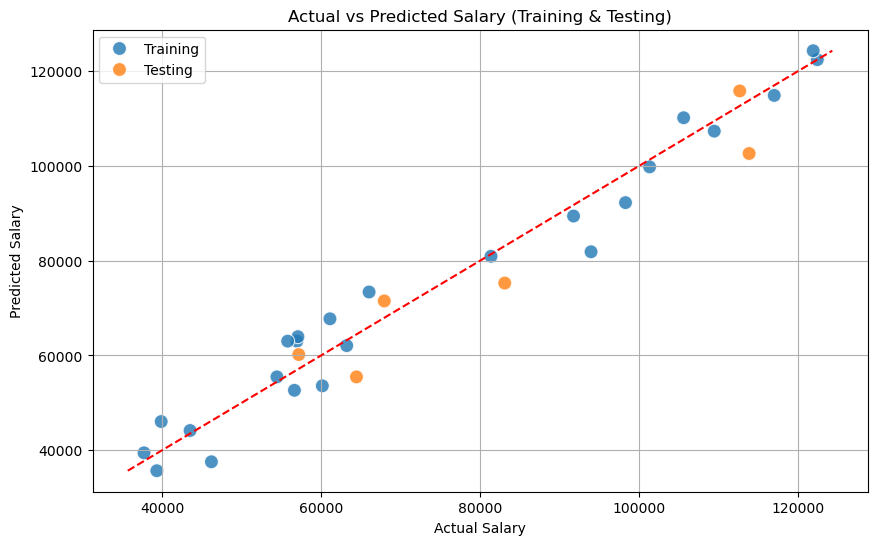

In [58]:
# Scatterplot com valores de treino e valores previsto
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Dataset': 'Training'})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Dataset': 'Testing'})
combined_results = pd.concat([train_results, test_results])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_results, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'r--')

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Training & Testing)')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation MSE scores:", -cv_scores)
print("Mean cross-validation MSE:", -cv_scores.mean())

Cross-validation MSE scores: [25905138.76967999 30974669.99857576 59780662.11837509 68417038.21806633
 35766738.2396581 ]
Mean cross-validation MSE: 44168849.46887106


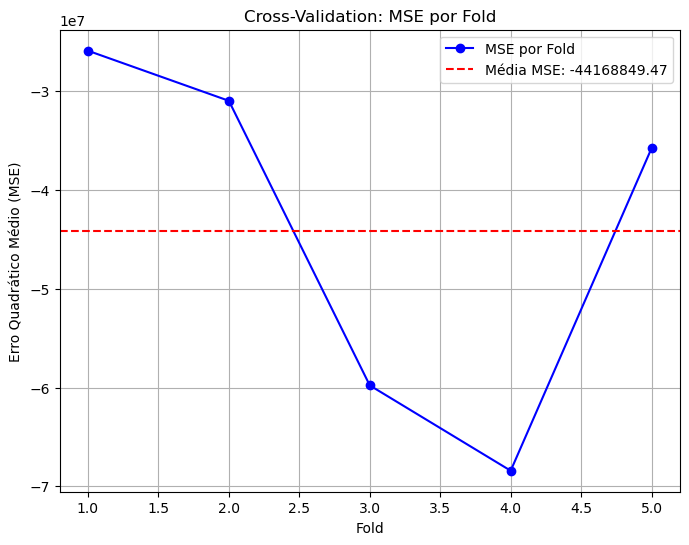

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cv_scores, marker='o', color='b', label='MSE por Fold')

plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Média MSE: {cv_scores.mean():.2f}')
plt.title('Cross-Validation: MSE por Fold')
plt.xlabel('Fold')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.grid(True)

plt.show()